### get movies data into shape for initial regressoion  

Variables for analysis:



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

movies = pd.read_pickle('movies_all_stars.pkl')
movies.set_index(['movie_title'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4810 entries, 0 to 4809
Data columns (total 41 columns):
color                        4794 non-null object
director_name                4740 non-null object
num_critic_for_reviews       4766 non-null float64
duration                     4799 non-null float64
director_facebook_likes      4740 non-null float64
actor_3_facebook_likes       4794 non-null float64
actor_2_name                 4810 non-null object
actor_1_facebook_likes       4804 non-null float64
gross                        4022 non-null float64
genres                       4810 non-null object
actor_1_name                 4810 non-null object
movie_title                  4810 non-null object
num_voted_users              4810 non-null int64
cast_total_facebook_likes    4810 non-null int64
actor_3_name                 4810 non-null object
facenumber_in_poster         4801 non-null float64
plot_keywords                4677 non-null object
movie_imdb_link              4810 non-

In [34]:
type(movies['ProductionBudget_x'])
movies['country'].value_counts()
movies.language.value_counts()
#movies.color.value_counts()


English       4652
French          26
Hindi           25
Spanish         18
Mandarin        12
Cantonese        8
German           7
Japanese         6
Russian          4
Italian          3
Arabic           3
Korean           3
Portuguese       2
Polish           2
Dutch            2
Hebrew           2
Aboriginal       2
Dari             2
Zulu             2
Thai             1
Tamil            1
Swahili          1
None             1
Norwegian        1
Kannada          1
Panjabi          1
Greek            1
Hungarian        1
Filipino         1
Telugu           1
Maya             1
Persian          1
Indonesian       1
Chinese          1
Swedish          1
Icelandic        1
Aramaic          1
Vietnamese       1
Slovenian        1
Urdu             1
Name: language, dtype: int64

In [35]:
az = movies[movies['title_year'] >= 2000]
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3437 entries, 0 to 4809
Data columns (total 41 columns):
color                        3425 non-null object
director_name                3437 non-null object
num_critic_for_reviews       3407 non-null float64
duration                     3427 non-null float64
director_facebook_likes      3437 non-null float64
actor_3_facebook_likes       3425 non-null float64
actor_2_name                 3437 non-null object
actor_1_facebook_likes       3431 non-null float64
gross                        2978 non-null float64
genres                       3437 non-null object
actor_1_name                 3437 non-null object
movie_title                  3437 non-null object
num_voted_users              3437 non-null int64
cast_total_facebook_likes    3437 non-null int64
actor_3_name                 3437 non-null object
facenumber_in_poster         3428 non-null float64
plot_keywords                3311 non-null object
movie_imdb_link              3437 non-

In [36]:
az = az[az['WorldwideGross_y'] > 0]
az['WorldwideGross_y'].describe()

count    3.182000e+03
mean     1.104116e+08
std      1.936188e+08
min      4.230000e+02
25%      8.556206e+06
50%      4.174472e+07
75%      1.184714e+08
max      2.783919e+09
Name: WorldwideGross_y, dtype: float64

In [38]:
az['content_rating'].value_counts()

R            1308
PG-13        1230
PG            427
Not Rated      57
G              48
Unrated        23
NC-17           3
Name: content_rating, dtype: int64

In [39]:
az = az[['color','duration','title_year','ProductionBudget_y',  'WorldwideGross_y','content_rating','num_stars']]
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 7 columns):
color                 3179 non-null object
duration              3175 non-null float64
title_year            3182 non-null float64
ProductionBudget_y    3182 non-null int64
WorldwideGross_y      3182 non-null int64
content_rating        3096 non-null object
num_stars             3182 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 198.9+ KB


In [41]:
az['rate_of_return'] = az['WorldwideGross_y']/az['ProductionBudget_y']
az['ln_rate_of_return'] = np.log(az['rate_of_return'])
az.info()
az.to_pickle('az.pkl')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 9 columns):
color                 3179 non-null object
duration              3175 non-null float64
title_year            3182 non-null float64
ProductionBudget_y    3182 non-null int64
WorldwideGross_y      3182 non-null int64
content_rating        3096 non-null object
num_stars             3182 non-null int64
rate_of_return        3182 non-null float64
ln_rate_of_return     3182 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 248.6+ KB


In [8]:
#az = movies[movies['title_year'] >= 2000]
#az = az.drop(['language', 'country', 'budget',
#                       'director_name', 'num_critic_for_reviews', 'genres',
#                       'actor_1_facebook_likes', 'actor_1_name',
#                        'actor_2_facebook_likes', 'actor_2_name',
#                        'actor_3_facebook_likes', 'actor_3_name',
#                        'num_voted_users','plot_keywords','director_facebook_likes',
#                        'gross','movie_title', 'cast_total_facebook_likes', 'facenumber_in_poster',
#                        'movie_imdb_link', 'imdb_score', 'aspect_ratio','Movie', 'ix',
#                          'num_user_for_reviews', 'ReleaseDate'
#                       ], axis=1)
#az.info()

In [9]:
az = pd.get_dummies(az,prefix = 'dum')


In [10]:
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 14 columns):
duration                3175 non-null float64
title_year              3182 non-null float64
ProductionBudget_y      3182 non-null int64
WorldwideGross_y        3182 non-null int64
num_stars               3182 non-null int64
dum_ Black and White    3182 non-null float64
dum_Color               3182 non-null float64
dum_G                   3182 non-null float64
dum_NC-17               3182 non-null float64
dum_Not Rated           3182 non-null float64
dum_PG                  3182 non-null float64
dum_PG-13               3182 non-null float64
dum_R                   3182 non-null float64
dum_Unrated             3182 non-null float64
dtypes: float64(11), int64(3)
memory usage: 372.9 KB


In [11]:

az['rate_of_return'] = az['WorldwideGross_y']/az['ProductionBudget_y']
az['ln_rate_of_return'] = np.log(az['rate_of_return'])
az.info()

az['WorldwideGross_y'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 16 columns):
duration                3175 non-null float64
title_year              3182 non-null float64
ProductionBudget_y      3182 non-null int64
WorldwideGross_y        3182 non-null int64
num_stars               3182 non-null int64
dum_ Black and White    3182 non-null float64
dum_Color               3182 non-null float64
dum_G                   3182 non-null float64
dum_NC-17               3182 non-null float64
dum_Not Rated           3182 non-null float64
dum_PG                  3182 non-null float64
dum_PG-13               3182 non-null float64
dum_R                   3182 non-null float64
dum_Unrated             3182 non-null float64
rate_of_return          3182 non-null float64
ln_rate_of_return       3182 non-null float64
dtypes: float64(13), int64(3)
memory usage: 422.6 KB


count    3.182000e+03
mean     1.104116e+08
std      1.936188e+08
min      4.230000e+02
25%      8.556206e+06
50%      4.174472e+07
75%      1.184714e+08
max      2.783919e+09
Name: WorldwideGross_y, dtype: float64

In [12]:
az['ProductionBudget_y'].min()

7000

In [13]:
X = az.drop(['WorldwideGross_y','dum_NC-17','dum_Not Rated','dum_Unrated'], axis=1)


In [14]:
for i in X.columns:
    print (i, (X[i].isnull().sum())/len(X))

duration 0.0021998742929
title_year 0.0
ProductionBudget_y 0.0
num_stars 0.0
dum_ Black and White 0.0
dum_Color 0.0
dum_G 0.0
dum_PG 0.0
dum_PG-13 0.0
dum_R 0.0
rate_of_return 0.0
ln_rate_of_return 0.0


In [15]:
X.duration=X.duration.fillna(X.duration.mean())



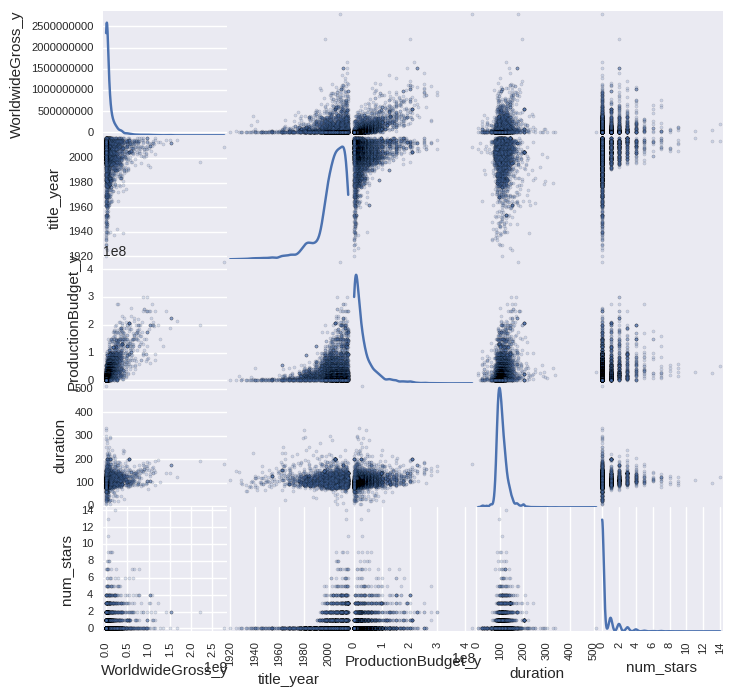

In [16]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(movies[['WorldwideGross_y','title_year','ProductionBudget_y','duration','num_stars']],
               alpha=0.2, figsize=(8, 8), diagonal='kde');

In [17]:
y = az['WorldwideGross_y']
print(y.isnull().sum())
y.describe()

0


count    3.182000e+03
mean     1.104116e+08
std      1.936188e+08
min      4.230000e+02
25%      8.556206e+06
50%      4.174472e+07
75%      1.184714e+08
max      2.783919e+09
Name: WorldwideGross_y, dtype: float64

In [18]:
#rate_of_return = az['WorldwideGross_y'] / az['ProductionBudget_y']
y2 = az['ln_rate_of_return']
y2.describe()
#plt.hist(np.log(rate_of_return));

count    3182.000000
mean        0.261588
std         1.798859
min        -8.983567
25%        -0.331244
50%         0.617248
75%         1.306912
max         6.067309
Name: ln_rate_of_return, dtype: float64

In [19]:
X2 = X.drop(['ProductionBudget_y', 'rate_of_return','ln_rate_of_return','dum_G','dum_Color'],axis=1)
X2.describe()

,duration,title_year,num_stars,dum_ Black and White,dum_PG,dum_PG-13,dum_R
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,108.800630,2008.086738,0.553740,0.024513,0.134192,0.386549,0.411062
std,21.492465,4.708079,1.231759,0.154659,0.340912,0.487035,0.492104
min,7.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.000000,2012.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,300.000000,2016.000000,14.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X2.to_pickle('X.pkl')
y2.to_pickle('y.pkl')

In [21]:
from sklearn import cross_validation, datasets
from sklearn import linear_model

/home/kmitchell/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        X2, y2, test_size=0.3)

In [23]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha=.2)
models['elasticnet'] = linear_model.ElasticNet()

In [24]:

for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(X2.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lasso
Score: 0.00885197094522
('duration', 0.011706106714556897)
('title_year', 0.0)
('num_stars', 0.0)
('dum_ Black and White', -0.0)
('dum_PG', 0.0)
('dum_PG-13', 0.0)
('dum_R', -0.0)

Model: elasticnet
Score: 0.00930141460237
('duration', 0.011068144637714075)
('title_year', 0.0)
('num_stars', 0.0)
('dum_ Black and White', -0.0)
('dum_PG', 0.0)
('dum_PG-13', 0.0)
('dum_R', -0.0)

Model: ridge
Score: 0.0595615536453
('dum_PG', 1.8179081410350835)
('dum_PG-13', 1.4962421253562077)
('dum_R', 1.1111525693392674)
('dum_ Black and White', -0.18826460705447234)
('num_stars', 0.020395488062019618)
('duration', 0.010752679696552856)
('title_year', -0.00063850917989245336)

Model: lin_reg
Score: 0.0593201395061
('dum_PG', 1.8523897751141987)
('dum_PG-13', 1.5269970333099478)
('dum_R', 1.1411233936156089)
('dum_ Black and White', -0.19003513242092376)
('num_stars', 0.01987675241018317)
('duration', 0.010731280590923434)
('title_year', -0.00056603664783463458)



In [25]:

import statsmodels.formula.api as sm


In [26]:
model = sm.OLS(y_train,X_train )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     34.88
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           1.97e-46
Time:                        13:27:31   Log-Likelihood:                -4380.7
No. Observations:                2227   AIC:                             8775.
Df Residuals:                    2220   BIC:                             8815.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
duration                 0.0107      0.002      6.073      0.000         0.007     0.014
title_year              -0.0011      0.000     -9.900      0.000        -0.001    -0.001
num_stars                0.0202      0.031      0.644      0.520        -0.041     0.082
dum_ Black and White    -0.1917      0.235     -0.815      0.415        -0.653     0.269
dum_PG                   1.8519      0.171     10.833      0.000         1.517     2.187
dum_PG-13                1.5264      0.153      9.948      0.000         1.226     1.827
dum_R                    1.1404      0.151      7.556      0.000         0.844     1.436
==============================================================================
Omnibus:                      467.458   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1274.906
Skew:                          -1.101   Prob(JB):                    1.44e-277
Kurtosis:                       5.982   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X_train2 = X_train.drop(['num_stars','dum_ Black and White'],axis=1)

In [28]:
model = sm.OLS(y_train,X_train2)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     48.63
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           6.82e-48
Time:                        13:29:30   Log-Likelihood:                -4381.2
No. Observations:                2227   AIC:                             8772.
Df Residuals:                    2222   BIC:                             8801.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration       0.0109      0.002      6.281      0.000         0.007     0.014
title_year    -0.0011      0.000    -10.071      0.000        -0.001    -0.001
dum_PG         1.8603      0.171     10.899      0.000         1.526     2.195
dum_PG-13      1.5385      0.153     10.075      0.000         1.239     1.838
dum_R          1.1500      0.151      7.637      0.000         0.855     1.445
==============================================================================
Omnibus:                      468.770   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.906
Skew:                          -1.104   Prob(JB):                    5.29e-278
Kurtosis:                       5.980   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model = sm.OLS(y_test,X_test )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     13.03
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           4.34e-16
Time:                        13:31:08   Log-Likelihood:                -1875.4
No. Observations:                 955   AIC:                             3765.
Df Residuals:                     948   BIC:                             3799.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
duration                 0.0056      0.003      1.976      0.048      3.88e-05     0.011
title_year              -0.0007      0.000     -4.129      0.000        -0.001    -0.000
num_stars                0.0447      0.044      1.008      0.314        -0.042     0.132
dum_ Black and White     0.0007      0.374      0.002      0.998        -0.734     0.735
dum_PG                   1.5269      0.272      5.620      0.000         0.994     2.060
dum_PG-13                1.4487      0.242      5.981      0.000         0.973     1.924
dum_R                    0.8404      0.239      3.510      0.000         0.371     1.310
==============================================================================
Omnibus:                      207.115   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.136
Skew:                          -1.078   Prob(JB):                    3.95e-132
Kurtosis:                       6.249   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X_test2 = X_test.drop(['num_stars','dum_ Black and White'],axis=1)

In [31]:
model = sm.OLS(y_test,X_test2 )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.06
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           3.81e-17
Time:                        13:31:49   Log-Likelihood:                -1875.9
No. Observations:                 955   AIC:                             3762.
Df Residuals:                     950   BIC:                             3786.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration       0.0061      0.003      2.174      0.030         0.001     0.012
title_year    -0.0008      0.000     -4.271      0.000        -0.001    -0.000
dum_PG         1.5482      0.271      5.719      0.000         1.017     2.079
dum_PG-13      1.4646      0.242      6.063      0.000         0.991     1.939
dum_R          0.8538      0.239      3.574      0.000         0.385     1.323
==============================================================================
Omnibus:                      209.555   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.200
Skew:                          -1.091   Prob(JB):                    1.90e-133
Kurtosis:                       6.255   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

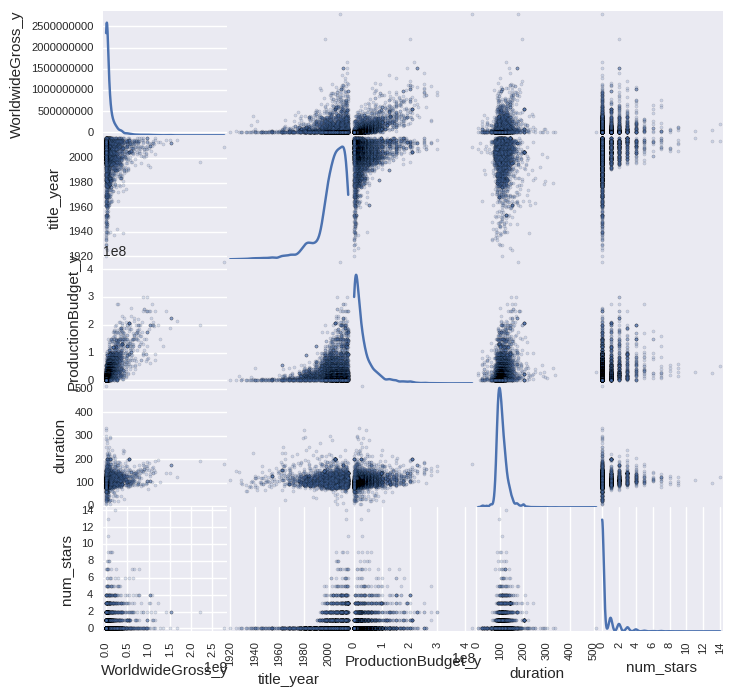

In [32]:
scatter_matrix(movies[['WorldwideGross_y','title_year','ProductionBudget_y','duration','num_stars']],
               alpha=0.2, figsize=(8, 8), diagonal='kde');